In [2]:
!pip install kmodes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes

In [4]:
df=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSSJI-cJuQkCv3bLDOl1kYJrABk65EckqqQiJFQYhwgsOew918BmQXoMcO-TlphfTdbKWaKQo1mJweZ/pub?output=csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VOTERID     200 non-null    int64 
 1   GENDER      200 non-null    object
 2   AGE         200 non-null    int64 
 3   ESTMD_COST  200 non-null    int64 
 4   PROFESSION  200 non-null    object
 5   CATEGORY    200 non-null    object
dtypes: int64(3), object(3)
memory usage: 9.5+ KB


In [6]:
df

,VOTERID,GENDER,AGE,ESTMD_COST,PROFESSION,CATEGORY
0,1,Male,19,10,STUDENTS,ELECTRICITY
1,2,Male,21,10,STUDENTS,ELECTRICITY
2,3,Female,20,13,STUDENTS,ELECTRICITY
3,4,Male,23,16,RESOUCE LABOURS,INFRASTRUCTURE
4,5,Male,31,17,OTHERS,INFRASTRUCTURE
...,...,...,...,...,...,...
195,196,Female,35,120,AGRICULTURE,ROADS
196,197,Female,45,126,AGRICULTURE,ROADS
197,198,Male,32,126,AGRICULTURE,ROADS
198,199,Male,32,137,AGRICULTURE,ROADS


In [7]:
df=df.drop(labels=['VOTERID'],axis='columns',inplace=False)
df

,GENDER,AGE,ESTMD_COST,PROFESSION,CATEGORY
0,Male,19,10,STUDENTS,ELECTRICITY
1,Male,21,10,STUDENTS,ELECTRICITY
2,Female,20,13,STUDENTS,ELECTRICITY
3,Male,23,16,RESOUCE LABOURS,INFRASTRUCTURE
4,Male,31,17,OTHERS,INFRASTRUCTURE
...,...,...,...,...,...
195,Female,35,120,AGRICULTURE,ROADS
196,Female,45,126,AGRICULTURE,ROADS
197,Male,32,126,AGRICULTURE,ROADS
198,Male,32,137,AGRICULTURE,ROADS


In [8]:
give_array=df.values

In [9]:
give_array[:,2]= give_array[:,1].astype(float)
give_array[:,3]= give_array[:,1].astype(float)

In [10]:
give_array

array([['Male', 19, 19.0, 19.0, 'ELECTRICITY'],
       ['Male', 21, 21.0, 21.0, 'ELECTRICITY'],
       ['Female', 20, 20.0, 20.0, 'ELECTRICITY'],
       ['Male', 23, 23.0, 23.0, 'INFRASTRUCTURE'],
       ['Male', 31, 31.0, 31.0, 'INFRASTRUCTURE'],
       ['Female', 22, 22.0, 22.0, 'INFRASTRUCTURE'],
       ['Male', 35, 35.0, 35.0, 'INFRASTRUCTURE'],
       ['Female', 23, 23.0, 23.0, 'INFRASTRUCTURE'],
       ['Male', 64, 64.0, 64.0, 'ELECTRICITY'],
       ['Female', 30, 30.0, 30.0, 'WATER'],
       ['Male', 67, 67.0, 67.0, 'ELECTRICITY'],
       ['Female', 35, 35.0, 35.0, 'INFRASTRUCTURE'],
       ['Male', 58, 58.0, 58.0, 'ELECTRICITY'],
       ['Female', 24, 24.0, 24.0, 'INFRASTRUCTURE'],
       ['Male', 37, 37.0, 37.0, 'ROADS'],
       ['Male', 22, 22.0, 22.0, 'ELECTRICITY'],
       ['Female', 35, 35.0, 35.0, 'INFRASTRUCTURE'],
       ['Male', 20, 20.0, 20.0, 'ELECTRICITY'],
       ['Male', 52, 52.0, 52.0, 'ELECTRICITY'],
       ['Female', 35, 35.0, 35.0, 'ELECTRICITY'],
       ['Mal

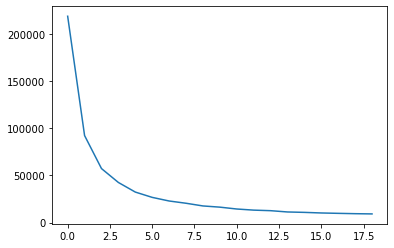

In [26]:
cost = []
for num_clusters in list(range(1,20)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(df, categorical=[0,3,4])
    cost.append(kproto.cost_)

plt.plot(cost)

In [12]:
kproto= KPrototypes(n_clusters=3,verbose=2,max_iter=20)
cluster=kproto.fit_predict(give_array,categorical=[0,3,4])

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 41, ncost: 14391.946748474858
Run: 1, iteration: 2/20, moves: 12, ncost: 13622.578357732706
Run: 1, iteration: 3/20, moves: 4, ncost: 13555.715386241925
Run: 1, iteration: 4/20, moves: 0, ncost: 13555.715386241925
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 48, ncost: 15711.510909010147
Run: 2, iteration: 2/20, moves: 7, ncost: 15550.297837451795
Run: 2, iteration: 3/20, moves: 9, ncost: 15308.596816043932
Run: 2, iteration: 4/20, moves: 5, ncost: 15037.254927453427
Run: 2, iteration: 5/20, moves: 13, ncost: 14335.474214326312
Ru

In [13]:
print(kproto.cluster_centroids_)

[['28.314285714285713' '28.314285714285713' 'Female' '32.0'
  'INFRASTRUCTURE']
 ['62.806451612903224' '62.806451612903224' 'Male' '59.0' 'ELECTRICITY']
 ['46.546875' '46.546875' 'Male' '49.0' 'ELECTRICITY']]


In [14]:
cluster_dict=[]
for c in cluster:
      cluster_dict.append(c)

In [15]:
df['cluster']=cluster_dict

In [16]:
df

,GENDER,AGE,ESTMD_COST,PROFESSION,CATEGORY,cluster
0,Male,19,10,STUDENTS,ELECTRICITY,0
1,Male,21,10,STUDENTS,ELECTRICITY,0
2,Female,20,13,STUDENTS,ELECTRICITY,0
3,Male,23,16,RESOUCE LABOURS,INFRASTRUCTURE,0
4,Male,31,17,OTHERS,INFRASTRUCTURE,0
...,...,...,...,...,...,...
195,Female,35,120,AGRICULTURE,ROADS,0
196,Female,45,126,AGRICULTURE,ROADS,2
197,Male,32,126,AGRICULTURE,ROADS,0
198,Male,32,137,AGRICULTURE,ROADS,0


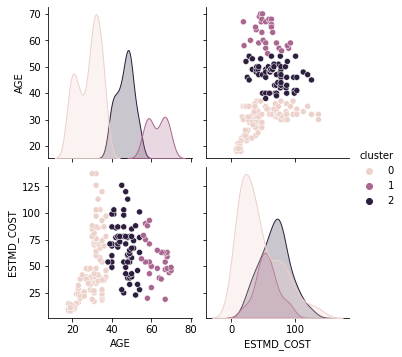

In [17]:
sns.pairplot(df,hue='cluster')

In [18]:
df[df['cluster']==1].head(10)

,GENDER,AGE,ESTMD_COST,PROFESSION,CATEGORY,cluster
8,Male,64,39,AGRICULTURE,ELECTRICITY,1
10,Male,67,19,AGRICULTURE,ELECTRICITY,1
12,Male,58,20,AGRICULTURE,ELECTRICITY,1
30,Male,60,30,AGRICULTURE,ELECTRICITY,1
40,Female,65,38,AGRICULTURE,ELECTRICITY,1
53,Male,59,43,AGRICULTURE,ELECTRICITY,1
57,Male,69,44,GOODS TRADERS,ROADS,1
60,Male,70,46,AGRICULTURE,ELECTRICITY,1
62,Female,67,47,GOODS TRADERS,ROADS,1
64,Male,63,48,AGRICULTURE,ELECTRICITY,1


In [19]:
df[df['cluster']==0].head(40)

,GENDER,AGE,ESTMD_COST,PROFESSION,CATEGORY,cluster
0,Male,19,10,STUDENTS,ELECTRICITY,0
1,Male,21,10,STUDENTS,ELECTRICITY,0
2,Female,20,13,STUDENTS,ELECTRICITY,0
3,Male,23,16,RESOUCE LABOURS,INFRASTRUCTURE,0
4,Male,31,17,OTHERS,INFRASTRUCTURE,0
5,Female,22,24,RESOUCE LABOURS,INFRASTRUCTURE,0
6,Male,35,18,OTHERS,INFRASTRUCTURE,0
7,Female,23,23,RESOUCE LABOURS,INFRASTRUCTURE,0
9,Female,30,19,ANIMAL HUSBANDRY,WATER,0
11,Female,35,19,OTHERS,INFRASTRUCTURE,0


In [20]:
df[df['cluster']==2].head(10)

,GENDER,AGE,ESTMD_COST,PROFESSION,CATEGORY,cluster
18,Male,52,23,AGRICULTURE,ELECTRICITY,2
22,Male,46,25,SEA IRRIGATION,WATER,2
24,Female,54,28,AGRICULTURE,ELECTRICITY,2
26,Male,45,28,SEA IRRIGATION,WATER,2
28,Female,40,49,GOVT SERVENTS,ROADS,2
32,Male,53,33,AGRICULTURE,ELECTRICITY,2
34,Male,49,33,SEA IRRIGATION,WATER,2
42,Male,48,39,SEA IRRIGATION,WATER,2
44,Female,49,39,SEA IRRIGATION,WATER,2
46,Female,50,40,AGRICULTURE,ELECTRICITY,2


AttributeError: module 'matplotlib.pyplot' has no attribute 'Xl'

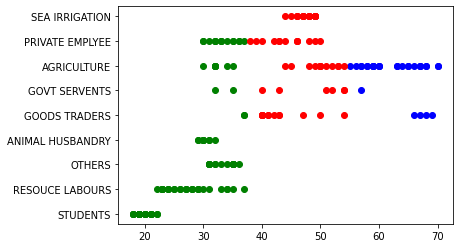

In [22]:
df1 =df[df.cluster==0]
df2 =df[df.cluster==1]
df3 =df[df.cluster==2]

plt.scatter(df1.AGE,df1['PROFESSION'], color='green')
plt.scatter(df2.AGE,df2['PROFESSION'],color='blue')
plt.scatter(df3.AGE,df3['PROFESSION'],color='red')
plt.Xl('AGE')
plt.y1('PROFESSION')
plt.legend()